# step 1 : Importing required libraries

In [1]:
!pip install tensorflow

  Using cached tensorflow-2.13.0-cp311-cp311-win_amd64.whl (1.9 kB)
                                              0.0/276.6 MB ? eta -:--:--
                                              0.0/276.6 MB ? eta -:--:--
                                              0.0/276.6 MB ? eta -:--:--
                                              0.0/276.6 MB ? eta -:--:--
                                              0.0/276.6 MB ? eta -:--:--
                                            0.1/276.6 MB 550.5 kB/s eta 0:08:23
                                            0.1/276.6 MB 550.5 kB/s eta 0:08:23
                                            0.1/276.6 MB 504.4 kB/s eta 0:09:09
                                            0.2/276.6 MB 612.6 kB/s eta 0:07:32
                                            0.2/276.6 MB 612.6 kB/s eta 0:07:32
                                            0.3/276.6 MB 820.5 kB/s eta 0:05:37
                                            0.3/276.6 MB 842.9 kB/s eta 0:05:28
       

  ERROR: Failed to restore c:\users\inamu\appdata\local\programs\python\python311\lib\site-packages\__pycache__\typing_extensions.cpython-311.pyc
ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\inamu\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\typing_extensions.py'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
#importing libraries to be used
import numpy as np # for linear algebra

import pandas as pd # data preprocessing

import matplotlib.pyplot as plt # data visualization library

import seaborn as sns # data visualization library

%matplotlib inline

import warnings
warnings.filterwarnings('ignore') # ignore warnings 

from sklearn.preprocessing import MinMaxScaler # for normalization

from keras.models import Sequential

from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [36]:
df = pd.read_csv('GOOG.csv') # data_importing

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


# step 2 : Gathering Insights

In [8]:
df.shape

(1258, 14)

In [9]:
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [11]:
df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [37]:
# Extracting required columns
df = df[['date','open','close']] 

In [38]:
# converting object dtype of date column to datetime dtype
df['date'] = pd.to_datetime(df['date'].apply(lambda x: x.split()[0])) #lambda function splits the data value by whitespace and return the first part, which is the data itself


In [41]:
# Setting date column as index
df.set_index('date',drop=True,inplace=True)

In [42]:
df.head()

,open,close
date,,
2016-06-14,716.48,718.27
2016-06-15,719.00,718.92
2016-06-16,714.91,710.36
2016-06-17,708.65,691.72
2016-06-20,698.77,693.71


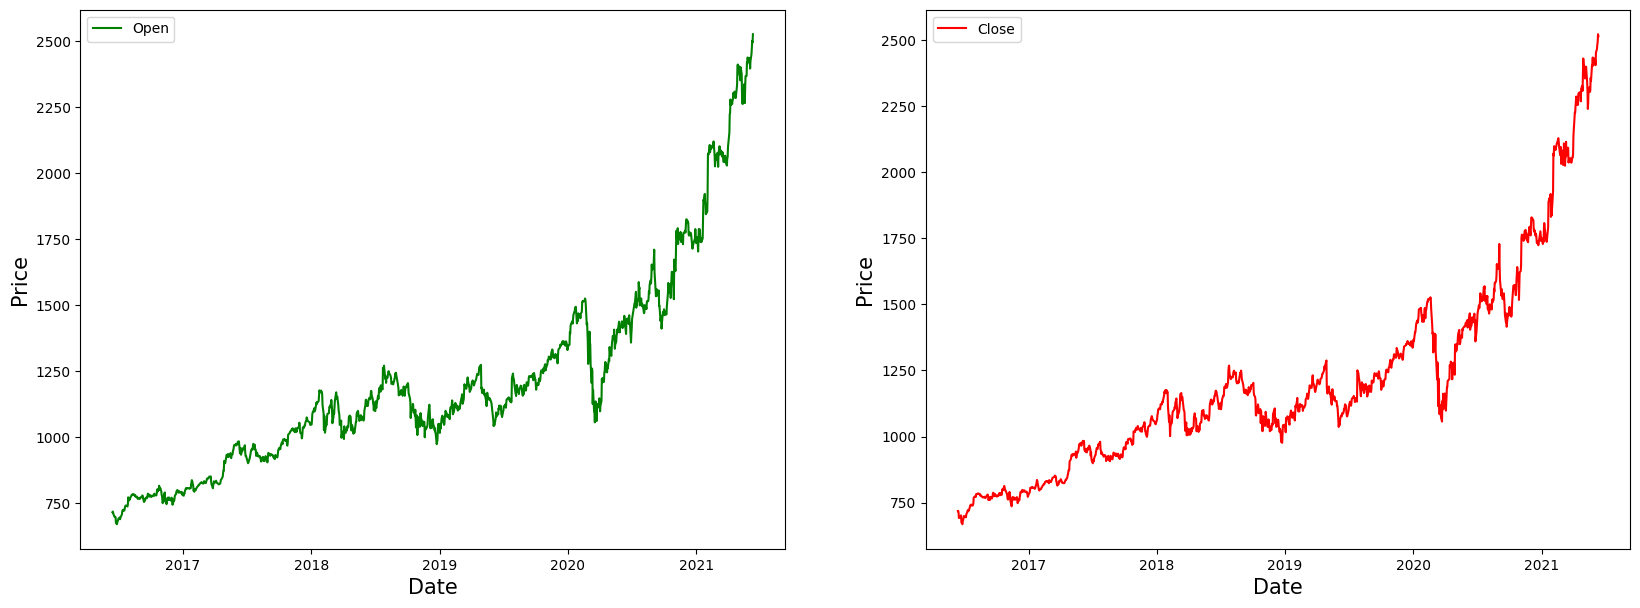

In [44]:
# plotting open and closing price on date index

fig, ax =plt.subplots(1,2,figsize=(20,7))

ax[0].plot(df['open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

# step 3 : Data Preprecessing

In [47]:
# normalizing all the values of all columns using MinMaxScaler

MMS = MinMaxScaler()   #MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. 
df[df.columns] = MMS.fit_transform(df)

In [48]:
df.head()

,open,close
date,,
2016-06-14,0.024532,0.026984
2016-06-15,0.025891,0.027334
2016-06-16,0.023685,0.022716
2016-06-17,0.020308,0.012658
2016-06-20,0.014979,0.013732


In [49]:
# splitting the data into training and test set

training_size = round(len(df) * 0.75) # Selecting 75 % for training and 25 % for testing

In [50]:
training_size

944

In [51]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((944, 2), (314, 2))

In [52]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [53]:
train_seq, train_label = create_sequence(train_data) 
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((894, 50, 2), (894, 2), (264, 50, 2), (264, 2))

# step 4 : Creating LSTM Model

In [54]:
# imported Sequential from keras.models 
model = Sequential()

# importing Dense, Dropout, LSTM, Bidirectional from keras.layers 
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)


Epoch 1/100
28/28 [==============================] - 5s 58ms/step - loss: 0.0082 - mean_absolute_error: 0.0639 - val_loss: 0.0216 - val_mean_absolute_error: 0.1238
Epoch 2/100
28/28 [==============================] - 1s 31ms/step - loss: 8.6900e-04 - mean_absolute_error: 0.0233 - val_loss: 0.0048 - val_mean_absolute_error: 0.0535
Epoch 3/100
28/28 [==============================] - 1s 31ms/step - loss: 4.7331e-04 - mean_absolute_error: 0.0162 - val_loss: 0.0029 - val_mean_absolute_error: 0.0411
Epoch 4/100
28/28 [==============================] - 1s 28ms/step - loss: 4.5123e-04 - mean_absolute_error: 0.0154 - val_loss: 0.0044 - val_mean_absolute_error: 0.0523
Epoch 5/100
28/28 [==============================] - 1s 28ms/step - loss: 4.5029e-04 - mean_absolute_error: 0.0156 - val_loss: 0.0050 - val_mean_absolute_error: 0.0556
Epoch 6/100
28/28 [==============================] - 1s 28ms/step - loss: 4.4727e-04 - mean_absolute_error: 0.0153 - val_loss: 0.0033 - val_mean_absolute_error: 0.0

28/28 [==============================] - 1s 27ms/step - loss: 2.1629e-04 - mean_absolute_error: 0.0109 - val_loss: 0.0042 - val_mean_absolute_error: 0.0523
Epoch 50/100
28/28 [==============================] - 1s 27ms/step - loss: 1.7098e-04 - mean_absolute_error: 0.0094 - val_loss: 0.0017 - val_mean_absolute_error: 0.0307
Epoch 51/100
28/28 [==============================] - 1s 27ms/step - loss: 1.5988e-04 - mean_absolute_error: 0.0092 - val_loss: 0.0043 - val_mean_absolute_error: 0.0541
Epoch 52/100
28/28 [==============================] - 1s 27ms/step - loss: 1.6954e-04 - mean_absolute_error: 0.0094 - val_loss: 0.0030 - val_mean_absolute_error: 0.0443
Epoch 53/100
28/28 [==============================] - 1s 27ms/step - loss: 1.7510e-04 - mean_absolute_error: 0.0095 - val_loss: 0.0017 - val_mean_absolute_error: 0.0318
Epoch 54/100
28/28 [==============================] - 1s 27ms/step - loss: 1.6506e-04 - mean_absolute_error: 0.0090 - val_loss: 0.0020 - val_mean_absolute_error: 0.0346

28/28 [==============================] - 1s 27ms/step - loss: 9.2555e-05 - mean_absolute_error: 0.0067 - val_loss: 0.0011 - val_mean_absolute_error: 0.0248
Epoch 98/100
28/28 [==============================] - 1s 27ms/step - loss: 9.8642e-05 - mean_absolute_error: 0.0068 - val_loss: 0.0020 - val_mean_absolute_error: 0.0357
Epoch 99/100
28/28 [==============================] - 1s 27ms/step - loss: 9.8773e-05 - mean_absolute_error: 0.0069 - val_loss: 0.0014 - val_mean_absolute_error: 0.0279
Epoch 100/100
28/28 [==============================] - 1s 27ms/step - loss: 1.0033e-04 - mean_absolute_error: 0.0070 - val_loss: 9.2197e-04 - val_mean_absolute_error: 0.0219


In [57]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

9/9 [==============================] - 1s 9ms/step


array([[0.40421405, 0.4024449 ],
       [0.40419066, 0.40277755],
       [0.40164262, 0.40020955],
       [0.406534  , 0.4043064 ],
       [0.41000345, 0.40757975]], dtype=float32)

In [58]:
# Inversing normalization/scaling on predicted data 
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]


array([[0.40421405, 0.4024449 ],
       [0.40419066, 0.40277755],
       [0.40164262, 0.40020955],
       [0.406534  , 0.4043064 ],
       [0.41000345, 0.40757975]], dtype=float32)

# step 5 : Data Visualization

In [59]:
# Merging actual and predicted data for better visualization
df_merge = pd.concat([df.iloc[-264:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-264:].index)], axis=1)

In [60]:
# Inversing normalization/scaling 
df_merge[['open','close']] = MMS.inverse_transform(df_merge[['open','close']])
df_merge.head()

,open,close,open_predicted,close_predicted
date,,,,
2020-05-27,0.402525,0.404448,0.404214,0.402445
2020-05-28,0.391527,0.403849,0.404191,0.402778
2020-05-29,0.402358,0.410427,0.401643,0.400210
2020-06-01,0.403140,0.411991,0.406534,0.404306
2020-06-02,0.409699,0.415984,0.410003,0.407580


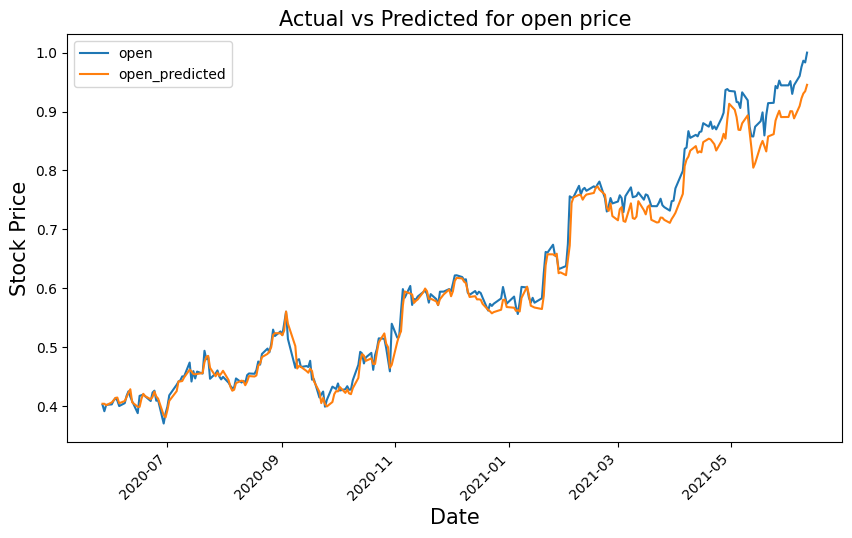

In [61]:
# plotting the actual open and predicted open prices on date index
df_merge[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

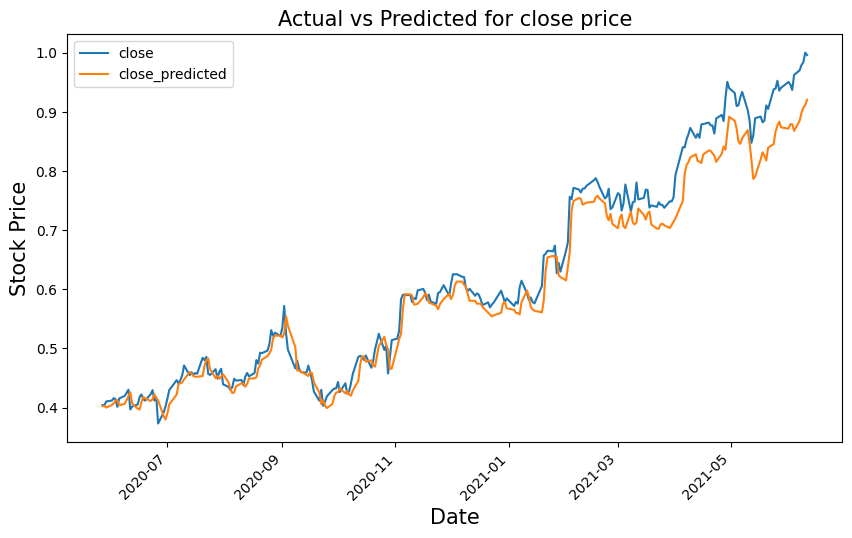

In [62]:
# plotting the actual close and predicted close prices on date index 
df_merge[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

# step 6 : Predicting Upcoming 10 Days

In [63]:
# Creating a dataframe and adding 10 days to existing index 

df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))
df_merge['2021-06-09':'2021-06-16']

,open,close,open_predicted,close_predicted
2021-06-09,0.986289,0.983705,0.930636,0.907058
2021-06-10,0.983327,1.000000,0.934515,0.911256
2021-06-11,1.000000,0.995862,0.945360,0.920494
2021-06-12,NaN,NaN,NaN,NaN
2021-06-13,NaN,NaN,NaN,NaN
2021-06-14,NaN,NaN,NaN,NaN
2021-06-15,NaN,NaN,NaN,NaN
2021-06-16,NaN,NaN,NaN,NaN


In [64]:
# creating a DataFrame and filling values of open and close column
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [65]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 25ms/step


In [66]:
# inversing Normalization/scaling
upcoming_prediction[['open','close']] = MMS.inverse_transform(upcoming_prediction[['open','close']])

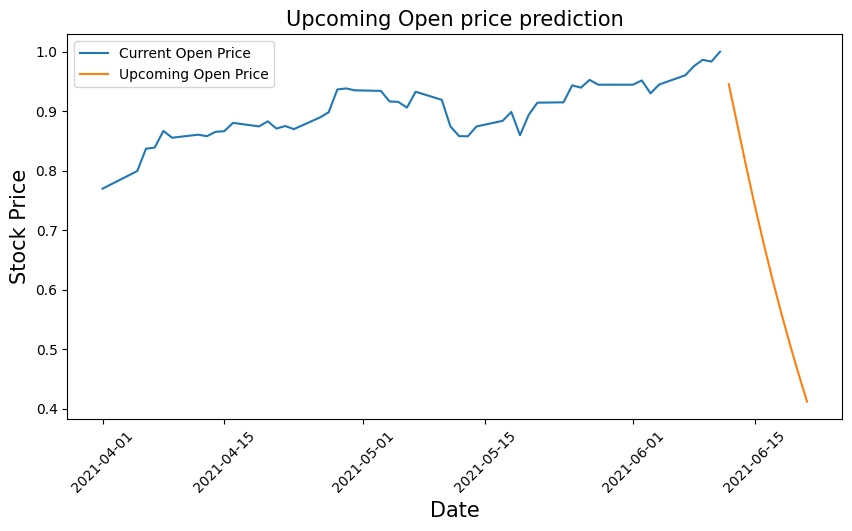

In [67]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

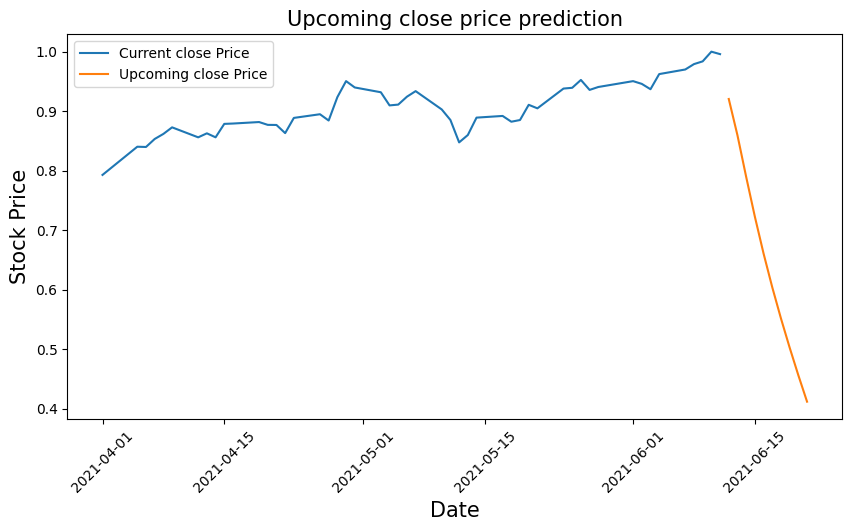

In [68]:
# plotting Upcoming Close price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()